### Pandas Ilustrado: La guía visual definitiva sobre los pandas

#### ¿Es una copia o una vista? ¿Debería fusionar o unir? ¿Y qué diablos es MultiIndex?

__Lev Maximov__

https://betterprogramming.pub/pandas-illustrated-the-definitive-visual-guide-to-pandas-c31fa921a43

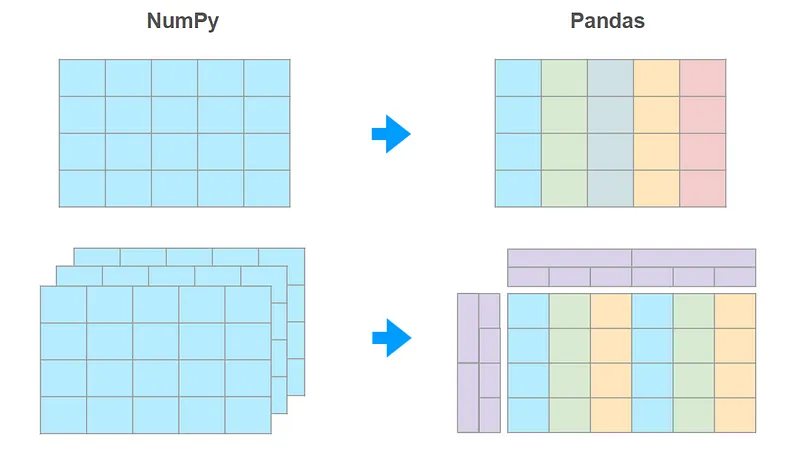

`Pandas` es un estándar de la industria para analizar datos en Python. Con unas pocas teclas, puede cargar, filtrar, reestructurar y visualizar gigabytes de información heterogénea. Construido sobre la biblioteca NumPy, toma prestados muchos de sus conceptos y convenciones de sintaxis, por lo que si se siente cómodo con NumPy, encontrará que Pandas es una herramienta bastante familiar. E incluso si nunca has oído hablar de NumPy, Pandas proporciona una gran oportunidad para tomar medidas enérgicas contra los problemas de análisis de datos con poca o ninguna experiencia en programación.

Hay muchas guías de Pandas por ahí. En este en particular, se espera que tengas un
conocimiento básico de NumPy. Si no lo haces, te sugiero que leas el NumPy ilustrado
guía para tener una idea de qué es una matriz NumPy, en qué formas es superior a una
lista de Python y cómo ayuda a evitar bucles en operaciones elementales.

Dos características clave que Pandas aporta a las matrices NumPy son:
1. Tipos heterogéneos: cada columna puede tener su propio tipo;
2. Índice: mejora la velocidad de búsqueda de las columnas especificadas.

Resulta que estas características son suficientes para hacer de Pandas un poderoso competidor tanto para las hojas de cálculo como para las bases de datos.
Polars, la reciente reencarnación de Pandas (escrita en Rust, por lo tantomás rápido ¹) ya no usa NumPy internamente, sin embargo, la sintaxis es bastante similar, por lo que aprender Pandas también te permitirá sentirte cómodo con Polars.

El artículo consta de cuatro partes:
- Parte 1. Motivación
- Parte 2. Serie e índice Parte

3. Marcos de datos
- Parte 4. Índice múltiple

… y es bastante extenso, aunque fácil de leer ya que se compone principalmente de imágenes.

Para una lectura de 1 minuto de los “primeros pasos” en Pandas, puedo recomendar un excelente
Introducción visual a los pandas ² de Jay Alammar.
[https://jalammar.github.io/gentle-visual-intro-to-data-analysis-python-pandas/]



#### Discusiones

- Noticias de piratas informáticos (263 puntos, 41 comentarios)
[https://news.ycombinator.com/item?id=34550735]
- Reddit r/Python (290 puntos, 29 comentarios)
[https://www.reddit.com/r/Python/comments/10mezt9/pandas_illustrated_the_definitive_visual_guide_to/?rdt=36798]

#### Contenido

1. __Motivación y escaparate__
    - Escaparate de pandas
    - Velocidad de los pandas
2. __Índice de series e índices__
    - Encontrar elemento por valor
    - Valores faltantes    
    - Comparaciones
    - Agrega, inserta, elimina
    - estadísticas
    - Datos duplicados
    - Cadenas y expresiones regulares
    - Agrupar por
3. __Marcos de datos__
    - Lectura y escritura de archivos CSV
    - Creación de un marco de datos
    - Operaciones básicas con DataFrames
    - Indexación de DataFrames
    - Aritmética del marco de datos
    - Combinando marcos de datos:
        - Apilamiento vertical
        - Apilado horizontal
        - Apilamiento mediante MultiIndex
    - Unirse a marcos de datos:
        - Se une una relación 1:1
        - Se une una relación 1:n
        - Múltiples uniones
    - Inserta y elimina
    - Agrupar por
    - Pivotar y 'despivotar'
4. __Índice múltiple__
    - Agrupación aparente
    - Conversiones de tipos
    - Construyendo DataFrame con Indexación
    - MultiIndex con MultiIndex
    - Apilar y desapilar
    - Cómo evitar que apilar/desapilar se clasifique
    - Manipulación de niveles
    - Convertir MultiIndex en un índice plano y restaurarlo nuevamente
    - Ordenando MultiIndex
    - Lectura y escritura de marcos de datos multiindexados en disco
    - aritmética multiíndice

#### Parte 1. Motivación y escaparate

Supongamos que tiene un archivo con un millón de líneas de valores separados por comas como este:

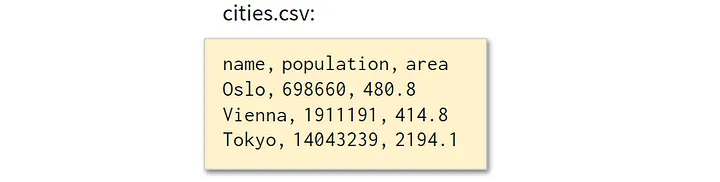

__Los espacios después de los dos puntos tienen únicamente fines ilustrativos. Generalmente no hay ninguno.__

Y necesitas dar respuestas a preguntas básicas como "¿Qué ciudades tienen un área de más de 450 km² y una población de menos de 10 millones" con NumPy.

La solución de fuerza bruta de introducir toda la tabla en una matriz NumPy no es una buena opción:
normalmente, las matrices NumPy son homogéneas (= todos los valores tienen el mismo tipo), por lo que todos los campos se interpretarán como cadenas y las comparaciones no funcionarán. como se esperaba.

Sí, NumPy tiene matrices estructuradas y de registros[https://betterprogramming.pub/a-comprehensive-guide-to-numpy-data-types-8f62cb57ea83#e16e] que permiten columnas de diferentes tipos, pero están destinadas principalmente a interactuar con código C. Cuando se utilizan para fines generales, tienen las siguientes desventajas:

- no es realmente intuitivo (por ejemplo, te enfrentarás a constantes como <f8 y <U8 en todos lados);

- tiene algunos problemas de rendimiento en comparación con los arreglos NumPy normales;

- almacenados de forma contigua en la memoria, por lo que cada adición o eliminación de columnas requiere la reasignación de toda la matriz;

- Todavía faltan muchas funciones de Pandas DataFrames.

Su próximo intento probablemente sea almacenar cada columna como un vector NumPy
independiente. Y después de eso, tal vez envolverlos en un `dict` por lo que puede ser más fácil
restaurar la integridad de la 'base de datos' si decide agregar o eliminar una o dos filas más
adelante. Así es como se vería:

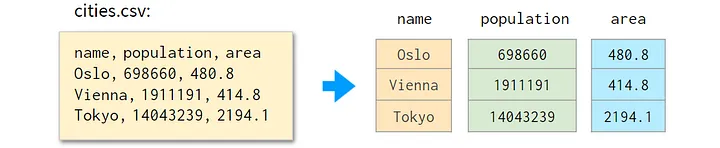

Si lo has hecho, ¡felicidades! Ha dado el primer paso para
reimplementar Pandas. :)

    - Escaparate de pandas

Considere la siguiente tabla:    

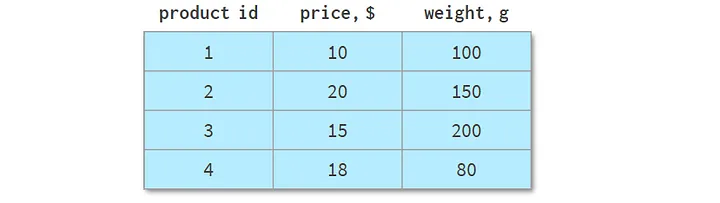

Describe la diversa línea de productos de una tienda online con un total de cuatro productos
distintos. A diferencia del ejemplo anterior, se puede representar igualmente bien con una
matriz NumPy o con un Pandas DataFrame. Pero veamos algunas operaciones comunes con
él.

__1.Clasificación__

Ordenar por columna es más legible con Pandas, como puede ver a continuación:

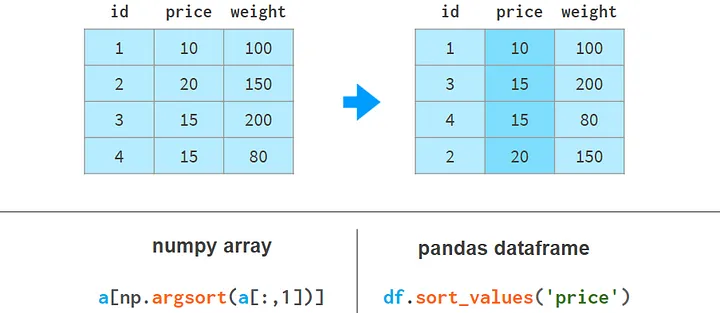

Aquíordenación `arg(a[:,1])` calcula la permutación que forma la segunda columna de
`a`ordenarse en orden ascendente y luego el exterior `a[…]` reordena las filas de `a`, respectivamente. Los pandas pueden hacerlo en un solo paso.

__2.Ordenar por varias columnas__

Si necesitamos ordenar por columna de precio rompiendo empates usando la columna de peso, la
situación empeora para NumPy:

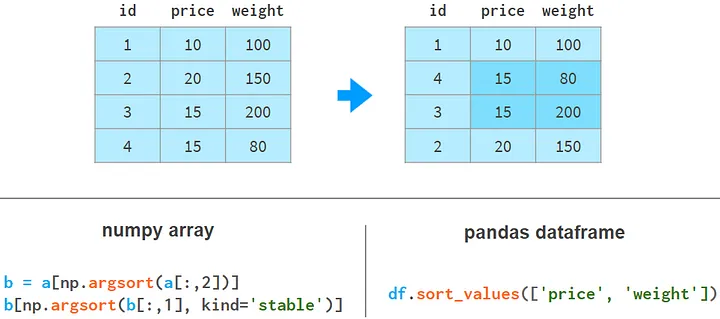

Con NumPy, primero ordenamos por peso y luego aplicamos el segundo pedido por precio. Un
algoritmo de clasificación estable garantiza que el resultado de la primera clasificación no se pierda
durante la segunda. Hay otras maneras[https://betterprogramming.pub/numpy-illustrated-the-visual-guide-to-numpy-3b1d4976de1d#b97e] de hacerlo con NumPy, pero ninguno es tan simple y elegante como con Pandas.

__3.Agregar una columna__

Agregar columnas es mucho mejor con Pandas, sintáctica y arquitectónicamente:

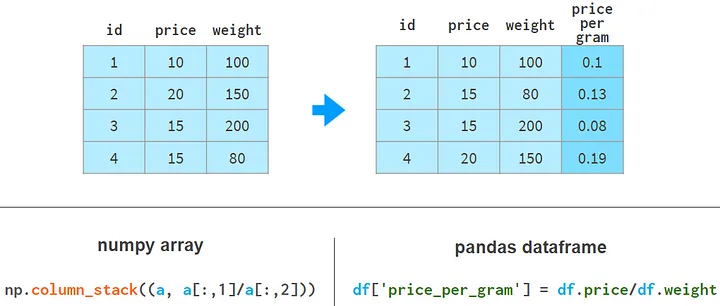

Pandas no necesita reasignar memoria para toda la matriz como NumPy; simplemente agrega una
referencia a una nueva columna y actualiza un "registro" de los nombres de las columnas.

__4.Búsqueda rápida de elementos__

Con las matrices NumPy, incluso si el elemento que busca es el primero, necesitará un tiempo
proporcional al tamaño de la matriz para encontrarlo. Con Pandas, puede indexar las columnas que
espera que se consulten con más frecuencia y reducir el tiempo de búsqueda a una constante.

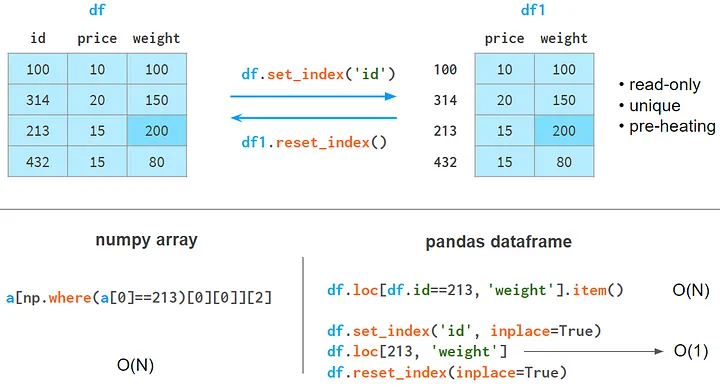

La columna de índice tiene las siguientes limitaciones:

- Requiere memoria y tiempo para construirse.
- Es de solo lectura (debe reconstruirse después de cada operación de agregar o eliminar).
- No es necesario que los valores sean únicos, pero la aceleración solo ocurre cuando los elementos son únicos.
- Requiere calentamiento: la primera consulta es algo más lenta que en NumPy, pero las siguientes son significativamente más rápidas.

__5. Uniones por columna__

Si desea complementar una tabla con información de otra tabla basada en una columna
común, NumPy no es de mucha ayuda. Pandas es mejor, especialmente para relaciones
1:n.

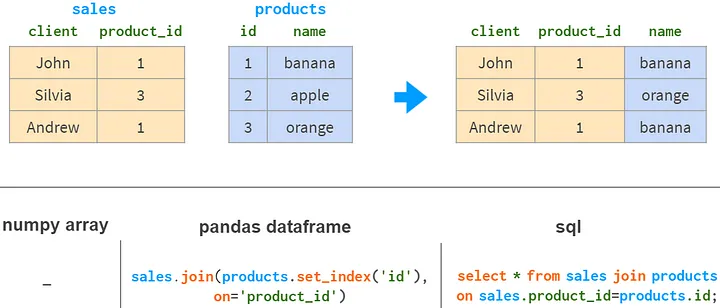

pandas `join` tiene todos los modos de unión familiares `"inner"`, `"left", `` "derecho"` y `"full outer"`.

__6. Agrupación por columna__

Otra operación común en el análisis de datos es agrupar por columna(s). Por ejemplo, para obtener la cantidad total de cada producto vendido, puedes hacer lo siguiente:

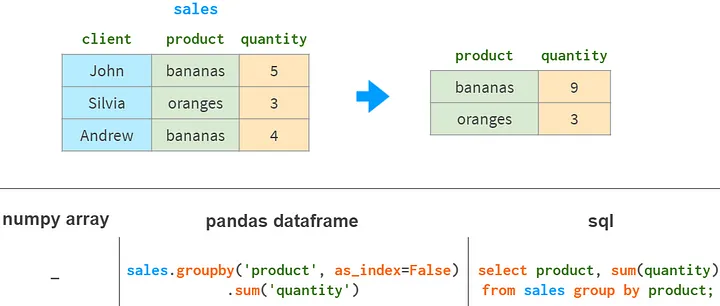

Además de `sum`, Pandas admite todo tipo de funciones agregadas: `mean`,
`max`, `min`, `count`, etc.

__7. Tablas dinámicas__

Una de las características más poderosas de Pandas es una tabla "pivote". Es algo así como
proyectar un espacio multidimensional en un plano bidimensional.

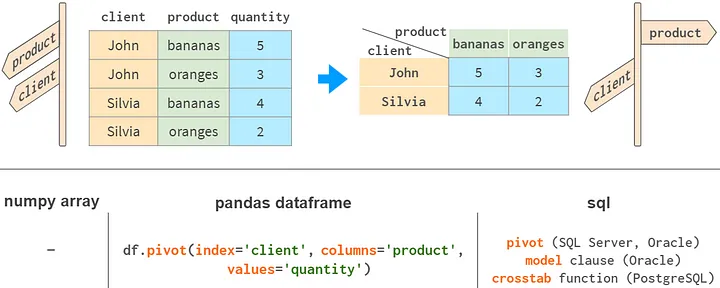

Aunque ciertamente es posible implementarlo con NumPy, esta funcionalidad falta "lista para usar", aunque está presente en todos los principales bases de datos relacionales³[] y aplicaciones de hojas de cálculo (Sobresalir ,Hojas de cálculo de Google[https://support.microsoft.com/en-us/office/create-a-pivottable-to-analyze-worksheet-data-a9a84538-bfe9-40a9-a8e9-f99134456576]).
Los pandas también tienendf `.pivot_table` que combina agrupación y pivotación en una sola herramienta.

En este punto, quizás te preguntes por qué alguien usaría NumPy si Pandas es tan bueno.
NumPy no es mejor ni peor, solo tiene diferentes casos de uso:

- Números aleatorios (p. ej., para pruebas)
- Álgebra lineal (p. ej., para redes neuronales)
- Imágenes y pilas de imágenes (por ejemplo, para CNN)
- Diferenciación, integración, trigonometría y demás personal científico.

En pocas palabras, las dos diferencias principales entre NumPy y Pandas son las
siguientes:

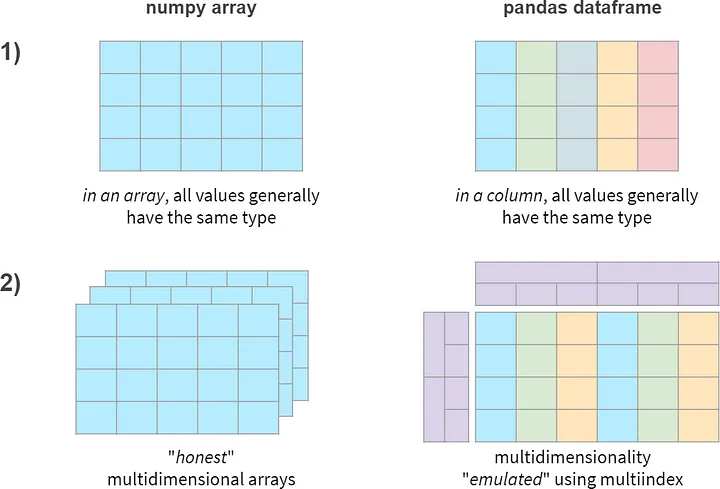